In [1]:
#%matplotlib inline
%matplotlib notebook

# conda install basemap netCDF4

In [2]:
from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt
import copy
from matplotlib import rcParams

In [3]:
# make tick labels smaller
rcParams['xtick.labelsize']=9
rcParams['ytick.labelsize']=9

# plot rainfall from NWS using special precipitation
colormap used by the NWS, and included in basemap.

## read a precipitation data

In [4]:
nc = NetCDFFile('data/nws_precip_conus_20061222.nc')
# data from http://water.weather.gov/precip/

prcpvar = nc.variables['amountofprecip']
data = 0.01*prcpvar[:]

latcorners = nc.variables['lat'][:]
loncorners = -nc.variables['lon'][:]

plottitle = prcpvar.long_name+' for period ending '+prcpvar.dateofdata

print(data.min(), data.max())
print(latcorners)
print(loncorners)
print(plottitle)
print(data.shape)

lon_0 = -nc.variables['true_lon'].getValue()
lat_0 = nc.variables['true_lat'].getValue()

-0.01 237.67000000000002
[23.476933 20.741228 45.439083 51.615555]
[-118.67131042480469 -82.3469009399414 -64.52022552490234
 -131.4470977783203]
24-Hour Rainfall for period ending 2006122212Z
(813, 1051)


## create polar stereographic Basemap instance.

In [5]:
# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[2],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[2],\
            rsphere=6371200.,resolution='l',area_thresh=10000)

## create figure

<IPython.core.display.Javascript object>


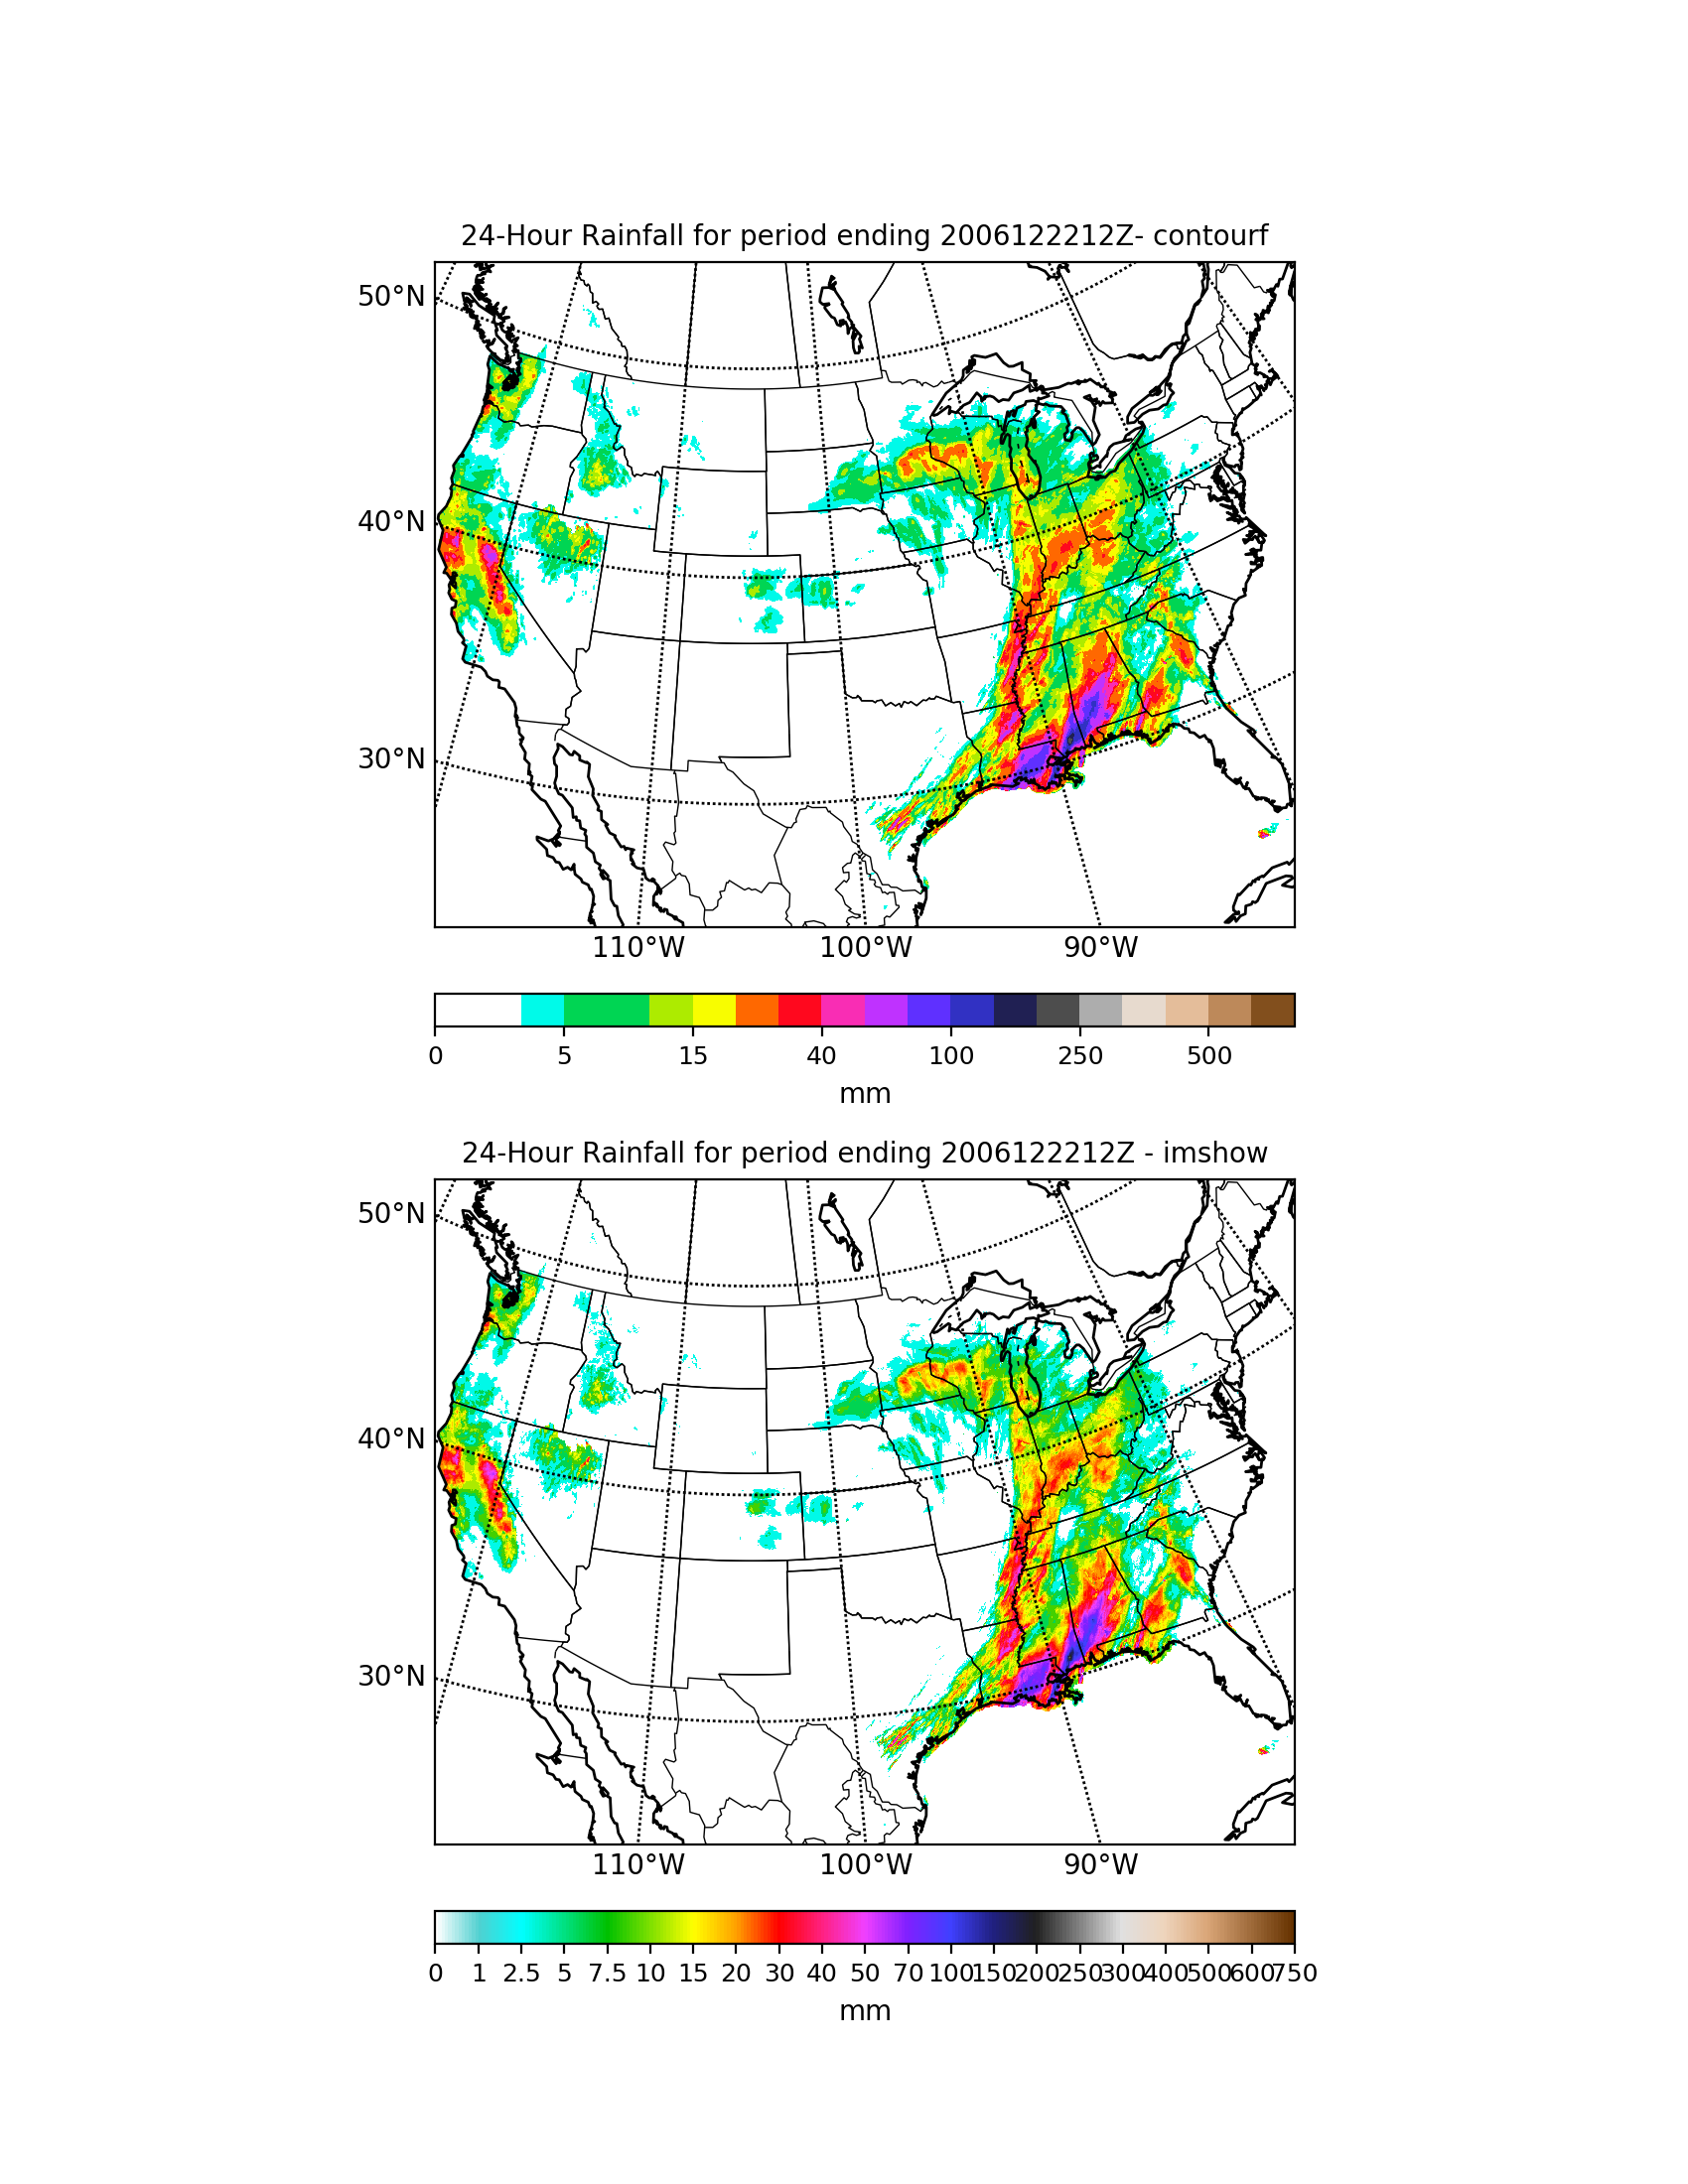

In [6]:
# create figure
fig = plt.figure(figsize=(8.5,11))
plt.subplot(211)
ax = plt.gca()

## draw coastlines, state and country boundaries, edge of map.

In [7]:
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# draw parallels.
delat = 10.0
parallels = np.arange(0.,90,delat)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)

# draw meridians
delon = 10.
meridians = np.arange(180.,360.,delon)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

{230.0: ([<matplotlib.lines.Line2D at 0x7fdd5a59f2b0>], []),
 240.0: ([<matplotlib.lines.Line2D at 0x7fdd5a59ffd0>], []),
 250.0: ([<matplotlib.lines.Line2D at 0x7fdd5a5a7908>],
  [Text(1181271.4165217017, -50053.873581428044, '110°W')]),
 260.0: ([<matplotlib.lines.Line2D at 0x7fdd5a5a7c18>],
  [Text(2507699.0664295447, -50053.873581428044, '100°W')]),
 270.0: ([<matplotlib.lines.Line2D at 0x7fdd5a5a7f28>],
  [Text(3874169.8152025305, -50053.873581428044, '90°W')]),
 280.0: ([<matplotlib.lines.Line2D at 0x7fdd5a5a5278>], []),
 290.0: ([<matplotlib.lines.Line2D at 0x7fdd5a5a5588>], [])}

## draw filled contours.

In [8]:
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.

# draw filled contours.
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)

## draw colorbar and title

In [9]:
# draw colorbar.
cbar = m.colorbar(cs,location='bottom',pad="10%")
cbar.set_label('mm')
# plot title
plt.title(plottitle+'- contourf',fontsize=10)

Text(0.5, 1.0, '24-Hour Rainfall for period ending 2006122212Z- contourf')

## create another map with coastlines, countires, ...

In [10]:
plt.subplot(212)
ax = plt.gca()
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# draw parallels.
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

{230.0: ([<matplotlib.lines.Line2D at 0x7fdd418a7668>], []),
 240.0: ([<matplotlib.lines.Line2D at 0x7fdd418ae320>], []),
 250.0: ([<matplotlib.lines.Line2D at 0x7fdd418aec18>],
  [Text(1181271.4165217017, -50053.873581428044, '110°W')]),
 260.0: ([<matplotlib.lines.Line2D at 0x7fdd418aef28>],
  [Text(2507699.0664295447, -50053.873581428044, '100°W')]),
 270.0: ([<matplotlib.lines.Line2D at 0x7fdd41836278>],
  [Text(3874169.8152025305, -50053.873581428044, '90°W')]),
 280.0: ([<matplotlib.lines.Line2D at 0x7fdd41836588>], []),
 290.0: ([<matplotlib.lines.Line2D at 0x7fdd41836898>], [])}

## draw image

In [11]:
# draw image
im = m.imshow(data,cmap=cm.s3pcpn,interpolation='nearest',vmin=0,vmax=750)

## make a copy of the image object, change colormap to linear version of the precip colormap.

In [12]:
# make a copy of the image object, change
# colormap to linear version of the precip colormap.
im2 = copy.copy(im)
im2.set_cmap(cm.s3pcpn_l)

## draw colorbar using im2
 not im (hack to prevent colors from being<br>
 too compressed at the low end on the colorbar - results<br>
 from highly nonuniform colormap)

In [13]:
# draw colorbar using im2, not im (hack to prevent colors from being
# too compressed at the low end on the colorbar - results
# from highly nonuniform colormap)
cb = m.colorbar(im2,location='bottom',pad="10%")
cb.set_label('mm')

## reset colorbar tick labels.

In [14]:
# reset colorbar tick labels.
cb.set_ticks(np.linspace(clevs[0],clevs[-1],len(clevs)))
cb.set_ticklabels(['%g' % clev for clev in clevs])

## plot title

In [15]:
# plot title
plt.title(plottitle+' - imshow',fontsize=10)
plt.show() # display onscreen.